Topics that shall be covered through demonstrations:

### SVM Classification (Linear and Non Linear)
* Bad-model versus good-model: large-margin classification (IRIS Dataset) using SVC
* SVM Sensitivity to feature scaling using simple 2d Data using using SVC - StandardScaler
* Hard margin versus Soft margin classification (IRIS Dataset) using LinearSVC
    * Regulating the margin using C hyperparameter
* Nonlinear SVM Classification using (Moons dataset) LinearSVC, PolynomialFeatures and Standard Scaler
* Solving SVM Classification using Kernel Trick - SVC Polynomial Kernel and StandardScaler
    * Regulating the margin with different degree, regularization coefficient and C hyperparameter
* Adding similarity features - Gaussian RBF function
* Using a Gaussian RBF Kernel - SVC with rbf kernel, Standard Scaler
    * Regulating with different gamma and C hyperparameters

### SVM Regression (Linear and Non Linear)
* SVM Linear Regression using LinearSVR and controlling the width of the margin using epsilon
* Using Kernel-ized SVM Regression model to model non-linear models - SVR with kernel, StandardScaler
    * Regulating the model with different epsilon and C hyper parameter

### How SVM and Kernelized Algorithms work
* Understanding the Linear SVM Decision functions - QP
    * Soft Margin
    * Hard Margin
* Dual problem
* Understanding the kernelized problem with Dual Problem
* Understanding Online Learning with Linear SVM algorithm and Kernelized SVMs

### SVM Classification (Linear)
* Well suited for complex, small/medium dataset classification.

For Linear SVM Classifiers, we shall cover the following topics:
* Bad-model versus good-model: large-margin classification (IRIS Dataset) using SVC
* SVM Sensitivity to feature scaling using simple 2d Data using using SVC - StandardScaler
* Hard margin versus Soft margin classification (IRIS Dataset) using LinearSVC
    * Regulating the margin using C hyperparameter


Importing the plotting library

In [1]:
from __future__ import division, print_function, unicode_literals
import matplotlib.pyplot as plt
%matplotlib inline

### Demonstrating a good model versus a bad model.

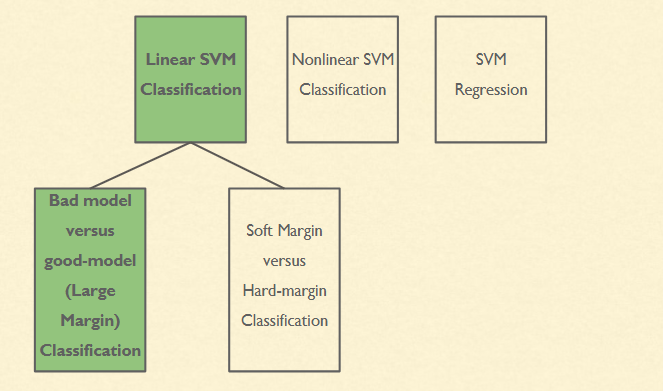

Following is demonstration of a good model versus a bad model. IRIS dataset is used to show several different decision boundary (classifier) that can be built for a given training dataset. 

A classifier should be large-margin, i.e., it should divide the datasets along a path that is widest.

In [2]:
# Large margin classification

from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

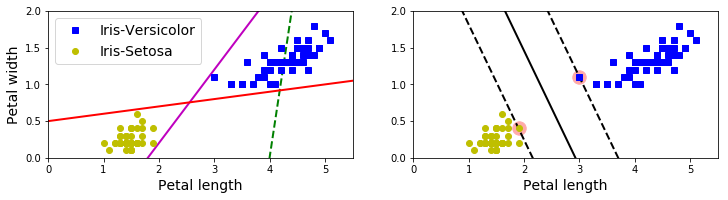

In [3]:
# Bad models

import numpy as np

x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-",  linewidth=2)
    plt.plot(x0, gutter_up,         "k--", linewidth=2)
    plt.plot(x0, gutter_down,       "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

# On left:
# dashed line = basically useless decision boundary.
# solid lines = OK for this dataset, but no margins. Probably will not work well on new instances.

# On right: SVM finds widest possible "street" between classes.

In [4]:
 svm_clf.intercept_[0]

-3.7882347112962464

In [5]:
 svm_clf.coef_

array([[1.29411744, 0.82352928]])

On left:
The green dashed line on the left figure below is basically useless decision boundary. It does not divide the datasets appropriately.
The solid lines are OK for this dataset, but no margins. Probably will not work well on new instances.

On the right figure below: SVM finds widest possible "street" between classes. A good model should have the widest possible street.

### Demonstration of SVM sensitivity to Feature-Scaling
Machine Learning models are very sensitive to feature-scaling. Feature scaling forms an important part of data transformation before training any machine learning model. In the next step, we traing a model without scaling the feature, then see how scaling works and train another model after scaling the features.
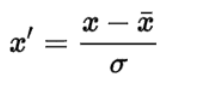

[0, 6, 0, 90]

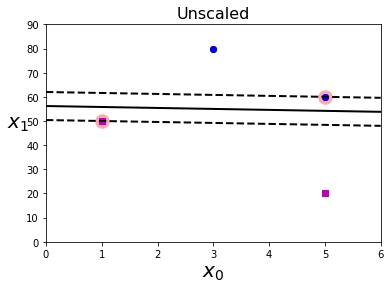

In [6]:
# Linear SVM Classification - Example - Without Scaling

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
#plt.show()
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

#plt.figure(figsize=(12,3.2))
#plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

Now, we try to understand how scaling works by calculating the mean and standard deviation of the original features. Calculating the new features using the formula:

And then calculating the scaled features using StandardScaler function os scikit-learn.
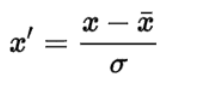

In [7]:
print('Original features properties: ')
print(Xs[:,0].mean())
print(Xs[:,0].std())
print(Xs[:,1].mean())
print(Xs[:,1].std())
print((Xs[:,0]-Xs[:,0].mean())/Xs[:,0].std())
print((Xs[:,1]-Xs[:,1].mean())/Xs[:,1].std())

Original features properties: 
3.5
1.6583123951777
52.5
21.650635094610966
[-1.50755672  0.90453403 -0.30151134  0.90453403]
[-0.11547005 -1.5011107   1.27017059  0.34641016]


In [8]:
# Linear SVM Classification - Example - With Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
print('Scaled features: ')
print(X_scaled)

Scaled features: 
[[-1.50755672 -0.11547005]
 [ 0.90453403 -1.5011107 ]
 [-0.30151134  1.27017059]
 [ 0.90453403  0.34641016]]


As can be seen, the StandardScaler function in scikit-learn does standardization feature-scaling.

Now, we try to fit the model to the scaled features and observe how it looks like by plotting it using matplotlib.plyplot.

[-2, 2, -2, 2]

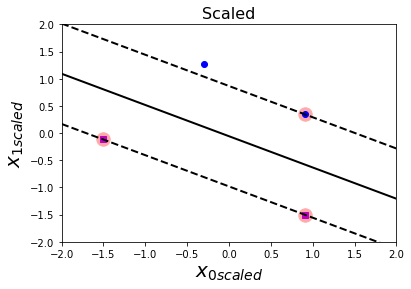

In [9]:
svm_clf.fit(X_scaled, ys)
#plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.ylabel("$x_{1scaled}$", fontsize=20)
plt.xlabel("$x_{0scaled}$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

# SVMs are sensitive to feature scaling. 
# Plot on right has much more robust feature boundary.

In [10]:
svm_clf.coef_

array([[0.62225468, 1.0825318 ]])

As can be seen. The model as observed after scaling the features is much better than the one observed using the
unscaled one.


### Go back to the slides


## 'Hard margin' classification versus 'soft margin' classification

Using the example below, we try to demonstrate the difference between 'hard margin' and 'soft margin' classification. Hard margin requires all the instances to be out of the street and all instances to on the right side of the street. It works only when the data is linearly separable. Soft margin classification helps in maintaining a balance between keeping the street as large as possible and limiting the margin violations. The balance can be regulated using the 'c' parameter in Scikit-Learn.

Here, we demonstrate 'hard margin' classification by keeping the 'C' parameter very high.

[0, 5.5, 0, 2]

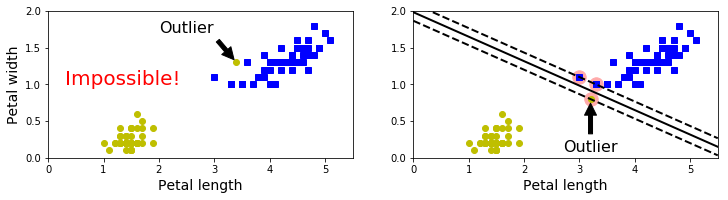

In [11]:
# "hard" margin classification:
# - all instances need to be "out of the street".
# - all instances need to be "on the right side of the street".
# problem: doable only if data is linearly separable
# problem: very sensitive to outliers

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)#float("inf"))
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=20, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

### Go back to the slides

## SVM Classification - Soft Margin

Now, we try to demonstrate soft margin classification for the same IRIS data by regulating the 'C' parameters.

Step 1: Load the IRIS data, get the features and labels.

In [12]:
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris["data"][:,[2,3]]
y = (iris["target"]==2).astype(np.float64)

Step 2: Do feature scaling of the features using StandardScaler() and model the SVM Linear classifier

In [13]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge")

scaled_svm_clf1 = Pipeline([
("scaler", scaler),
    ("linear_svc", svm_clf1)
])

scaled_svm_clf1.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

Step 3: Test the model using a sample data

In [14]:
scaled_svm_clf1.predict([[5.5, 1.7]])

array([1.])

Now, for illustration of the model process, we shall plot the decision boundary along with the training data. Some steps involved are:
1. Convert to unscaled parameters
2. Finding support vectors
3. Plot it on the graph

In [15]:
b2 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
w2 = svm_clf1.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w2])

Step 2: Finding the support vectors

In [16]:
t = y * 2 - 1
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx2]

Step 3: Plotting it on the graph

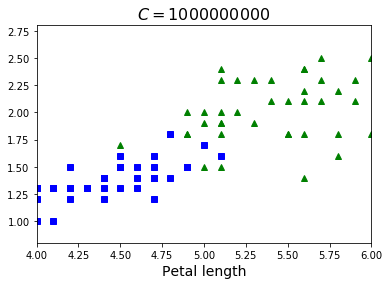

In [17]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])
plt.show()

In [18]:
# soluton to "hard margins" problem:
# control hardness with C hyperparameter

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=100, loss="hinge")
svm_clf2 = LinearSVC(C=1, loss="hinge")

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

scaled_svm_clf2.predict([[5.5, 1.7]])

array([1.])

In [19]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

[4, 6, 0.8, 2.8]

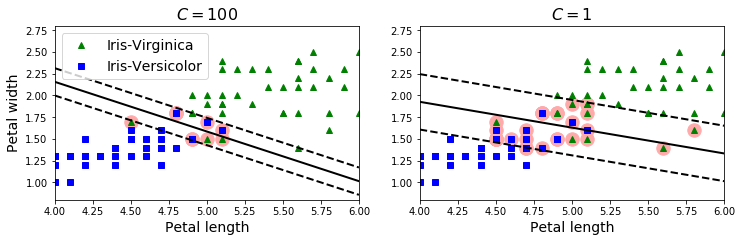

In [20]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

### Go back to the slides

### SVM Classification (Non-Linear)

For Nonlinear SVM Classification, we shall be covering the following topics:
* Nonlinear SVM Classification using (Moons dataset) LinearSVC, PolynomialFeatures and Standard Scaler
* Solving SVM Classification using Kernel Trick - SVC Polynomial Kernel and StandardScaler
    * Regulating the margin with different degree, regularization coefficient and C hyperparameter
* Adding similarity features - Gaussian RBF function
* Using a Gaussian RBF Kernel - SVC with rbf kernel, Standard Scaler
    * Regulating with different gamma and C hyperparameters

#### SVM Nonlinear Classification - Simple Example PolynomialFeatures

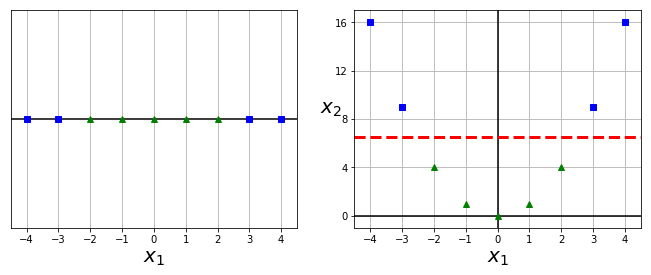

In [21]:
# some (most?) datasets are not linearly separable. simple example below.

X1D = np.linspace(-4, 4, 9).reshape(-1, 1)

X2D = np.c_[X1D, X1D**2] # adds 2nd, non-linear dimension.

y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

#save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

# result: adding 2nd dimension (on right) makes dataset linearly separable

### Go back to the slides

[[-0.92892087  0.20526752]
 [ 1.86247597  0.48137792]
 [-0.30164443  0.42607949]
 [ 1.05888696 -0.1393777 ]
 [ 1.01197477 -0.52392748]]
[0 1 1 0 1]


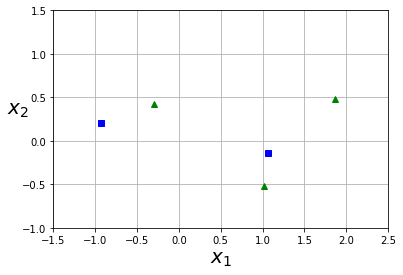

In [22]:
# test on "moons" dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=5, noise=0.15, random_state=42)
print(X)
print(y)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

#### SVM Nonlinear Classification - MOONS dataset

In [23]:
# test on "moons" dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

[[-0.08253517  0.57731496]
 [ 1.07107913  0.20526752]]
[1 0]


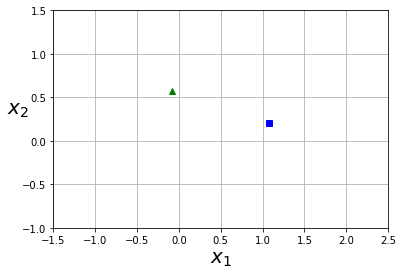

In [24]:
# test on "moons" dataset

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=2, noise=0.15, random_state=42)
print(X)
print(y)
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures
X, y = make_moons(n_samples=2, noise=0.15, random_state=42)
np.set_printoptions(precision=2, suppress=True)
print(X)
print(y)
poly=PolynomialFeatures(degree=3)
x1=poly.fit_transform(X)
print(x1)

[[-0.08  0.58]
 [ 1.07  0.21]]
[1 0]
[[ 1.   -0.08  0.58  0.01 -0.05  0.33 -0.    0.   -0.03  0.19]
 [ 1.    1.07  0.21  1.15  0.22  0.04  1.23  0.24  0.05  0.01]]


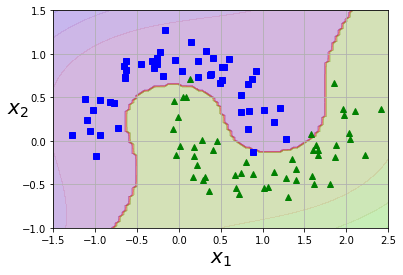

In [26]:
# do this in Scikit with a Pipeline. Contents:
# 1) Polynomial Features
# 2) StandardScaler
# 3) LinearSVC

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# test on "moons" dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

#save_fig("moons_polynomial_svc_plot")
plt.show()

In [27]:
plt.cm.brg?

### Go back to the slides

In [28]:
from sklearn.svm import SVC
help(SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly

### Solving polynomial-feature problems (aka combinatorial explosion) via the kernel trick



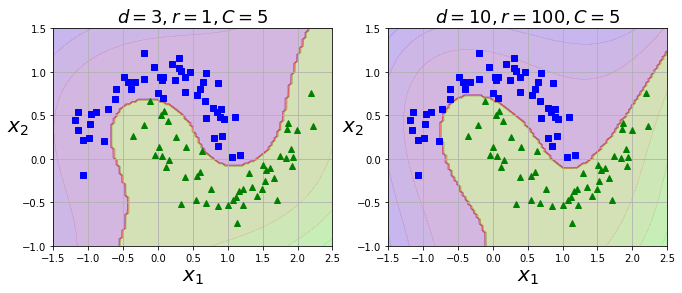

In [29]:
from sklearn.svm import SVC
# test on "moons" dataset
from sklearn.datasets import make_moons
X_all, y_all = make_moons(n_samples=150, noise=0.15, random_state=42)
X, X_test, y, y_test = X_all[:100], X_all[100:], y_all[:100], y_all[100:]

# train SVM classifier using 3rd-degree polynomial kernel
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(
        kernel="poly", degree=3, coef0=1, C=5))
])

# train SVM classifier using 10th-degree polynomial kernel (for comparison)
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])

poly_kernel_svm_clf.fit(X, y)
poly100_kernel_svm_clf.fit(X, y)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

#save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

# left: 3rd-degree polynomial; right: 10th-degree polynomial.
# if overfitting, reduce polynomial degree. if underfitting, bump it up.
# "coef0": controls high- vs low-degree polynomial influence.

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
y_predict = poly100_kernel_svm_clf.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[22,  2],
       [ 1, 25]])

In [32]:
y_predict = poly_kernel_svm_clf.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[23,  1],
       [ 0, 26]])

In [33]:
i = 100000000
count = 0
while i > 0:
    count += 1
    i = i - 2;
print("----")
print(count)

# O(log2 n)
# log3 n

# Binary search
# 10 seconds for 1000
# 27 seconds for 100000000



----
50000000


In [34]:
i = 100000000
count = 0
while i > 0:
    count += 1
    i = i//2;
print("----")
print(count)

# O(log2 n)
# log3 n

# Binary search
# 10 seconds for 1000
# 27 seconds for 100000000



----
27


In [35]:
x = [10, 10, 1, 2, 5,7]
# O(n)
for i in x:
    print(i*3)

counter = 0
for i in x:
    for j in x:
        counter += 1
        if i == j:
            print(i*j)
print("COunter:")
print(counter)
#O(n**2)

    

30
30
3
6
15
21
100
100
100
100
1
4
25
49
COunter:
36


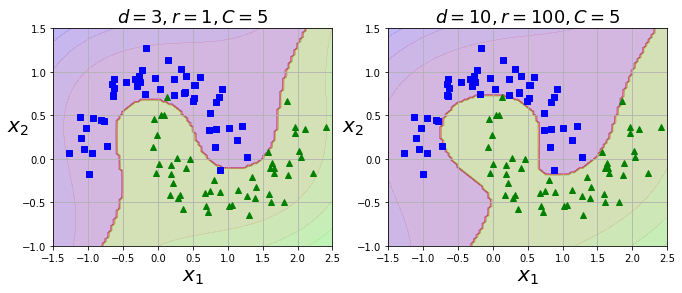

In [36]:
# from sklearn.svm import SVC
# test on "moons" dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)


# train SVM classifier using 3rd-degree polynomial kernel
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(
        kernel="poly", degree=3, coef0=1, C=5))])

# train SVM classifier using 10th-degree polynomial kernel (for comparison)
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])

poly_kernel_svm_clf.fit(X, y)
poly100_kernel_svm_clf.fit(X, y)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

#save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

# left: 3rd-degree polynomial; right: 10th-degree polynomial.
# if overfitting, reduce polynomial degree. if underfitting, bump it up.
# "coef0": controls high- vs low-degree polynomial influence.

#### Nonlinear SVM Classification - Adding Similarity  Features

* **similarity function**: measures how much an instance resembles specified landmark.

[-4.5, 4.5, -0.1, 1.1]

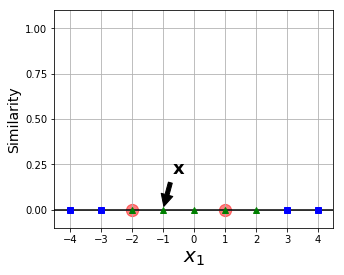

In [37]:
# define similarity function to be Gaussian Radial Basis Function (RBF)
# equals 0 (far away) to 1 (at landmark)

def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
#plt.plot(x1s, x2s, "g--")
#plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
#plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
#plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

[[0.3  0.  ]
 [0.74 0.01]
 [1.   0.07]
 [0.74 0.3 ]
 [0.3  0.74]
 [0.07 1.  ]
 [0.01 0.74]
 [0.   0.3 ]
 [0.   0.07]]


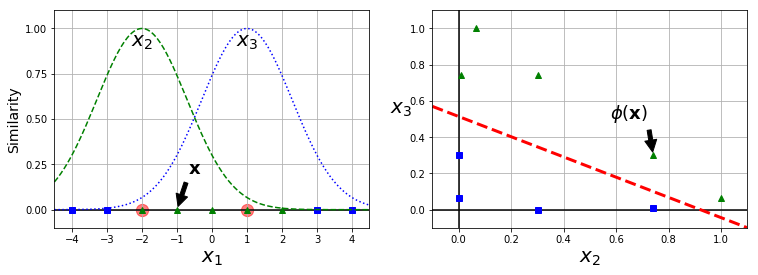

In [38]:
# define similarity function to be Gaussian Radial Basis Function (RBF)
# equals 0 (far away) to 1 (at landmark)

def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])
print(XK)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

#save_fig("kernel_method_plot")
plt.show()

In [39]:
myx = np.array([[1],[2]])
gaussian_rbf(myx, 1.6, 10)

array([0.03, 0.2 ])

In [40]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74]
Phi(-1.0, 1) = [0.3]


### Using a Gaussian RBF Kernel

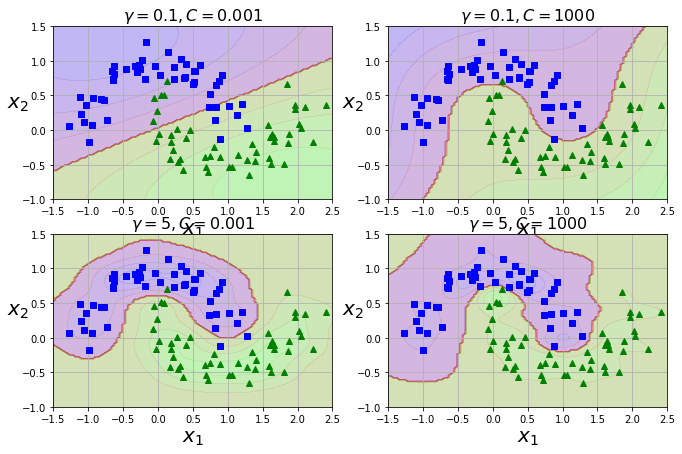

In [41]:
from sklearn.svm import SVC

# test on "moons" dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

#save_fig("moons_rbf_svc_plot")
plt.show()

# below: model trained with different values of gamma and C.
# GAMMA:
# bigger gamma = narrower bell curve, so each instance's area of influence = smaller.
# smaller gamma: bigger bell curve = smoother decision boundary.

### SVM Regression (Linear & Non-Linear)

* Objectives: 1) fit max #instances *on* the street; 2) find min #margin violations (instances "off" the street").
* Width controlled by epsilon hyperparameter.
* Below: random linear dataset. two training results with different vals of epsilon.

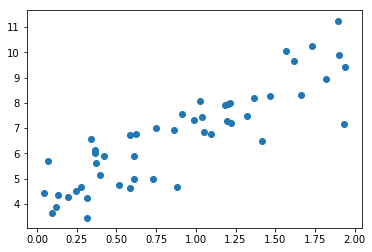

In [42]:
### Example
#### Step 1: Generating random numbers and making a linear relationship 
import numpy.random as rnd
import matplotlib.pyplot as plt
import pandas as pd

rnd.seed(42)
m = 50
X = 2 * rnd.rand(m,1)
y = (4 + 3 * X + rnd.randn(m,1)).ravel()
plt.scatter(X,y)
plt.show()

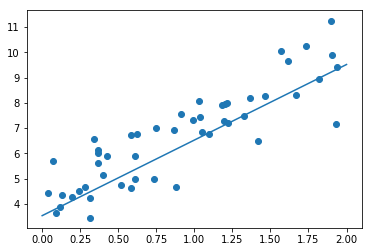

In [43]:
#### Step 2: Fitting a linear Support Vector Regression model to the data
from sklearn.svm import LinearSVR
svm_reg1 = LinearSVR(epsilon=1.5)
svm_reg1.fit(X,y)

x1s = np.linspace(0,2,100)
y1s = svm_reg1.coef_*x1s + svm_reg1.intercept_
plt.scatter(X,y)
plt.plot(x1s, y1s)
plt.show()

Text(0.5,1,'eps = 1.5')

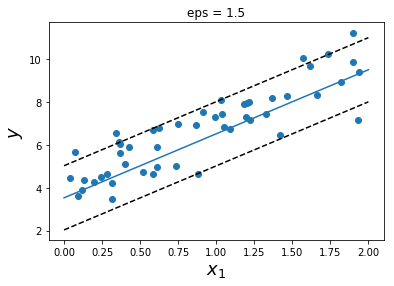

In [44]:
#### Step 3: Plotting the epsilon lines
y1s_eps1 = y1s + 1.5
y1s_eps2 = y1s - 1.5
plt.scatter(X,y)
plt.plot(x1s, y1s)
plt.plot(x1s, y1s_eps1,'k--')
plt.plot(x1s, y1s_eps2,'k--')
plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18)
plt.title('eps = 1.5')

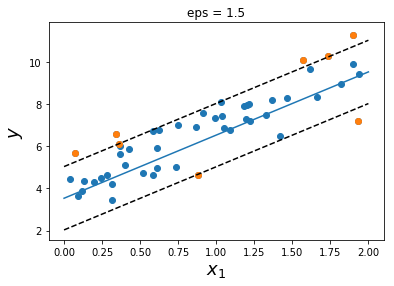

In [45]:
#### Step 4: Finding the instances off-the-street and plotting
y_pred = svm_reg1.predict(X)
supp_vec_X = X[np.abs(y-y_pred)>1.5]
supp_vec_y = y[np.abs(y-y_pred)>1.5]

plt.scatter(X,y)
plt.plot(x1s, y1s)
plt.plot(x1s, y1s_eps1,'k--')
plt.plot(x1s, y1s_eps2,'k--')
plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18)
plt.title('eps = 1.5')
plt.scatter(supp_vec_X,supp_vec_y)
plt.show()

### Go back to the slides

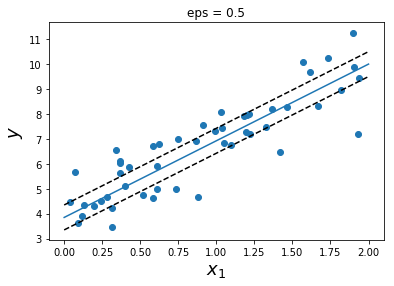

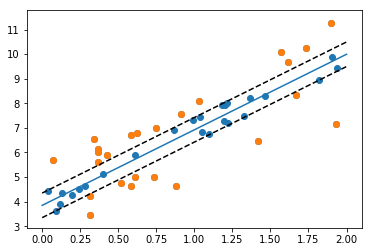

In [46]:
### Example 2: Linear SVM Regression in Scikit-Learn with eps = 0.5

import numpy.random as rnd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import LinearSVR

rnd.seed(42)
m=50
X = 2 * rnd.rand(m,1)
y = (4 + 3 * X + rnd.randn(m,1)).ravel()

svm_reg2 = LinearSVR(epsilon = 0.5)
svm_reg2.fit(X,y)
x1s = np.linspace(0,2,100)
y1s = svm_reg2.coef_*x1s + svm_reg2.intercept_
y1s_eps1 = y1s + 0.5
y1s_eps2 = y1s - 0.5
plt.scatter(X,y)
plt.plot(x1s,y1s)
plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18)
plt.plot(x1s,y1s_eps1,'k--')
plt.plot(x1s,y1s_eps2,'k--')
plt.title('eps = 0.5')
plt.show()

y_predict = svm_reg2.predict(X)
supp_vect_X = X[np.abs(y - y_predict) > 0.5]
supp_vect_y = y[np.abs(y - y_predict) > 0.5]

plt.scatter(X,y)
plt.plot(x1s,y1s)
plt.plot(x1s,y1s_eps1,'k--')
plt.plot(x1s,y1s_eps2,'k--')
plt.scatter(supp_vect_X,supp_vect_y)

### Go back to the slides

Text(0,0.5,'$y$')

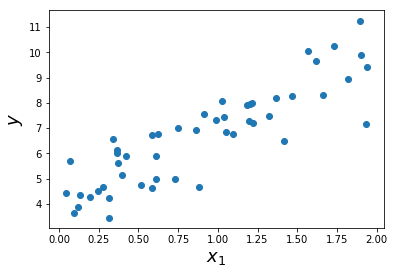

In [47]:
### Linear SVM Regression: Comparison of eps = 1.5 and exp-0.5
from sklearn.svm import LinearSVR
import numpy.random as rnd

rnd.seed(42)
m = 50
X = 2 * rnd.rand(m, 1)
y = (4 + 3 * X + rnd.randn(m, 1)).ravel()

svm_reg1 = LinearSVR(epsilon=1.5)
svm_reg2 = LinearSVR(epsilon=0.5)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])
plt.scatter(X,y)
plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18)

### Go back to the slides

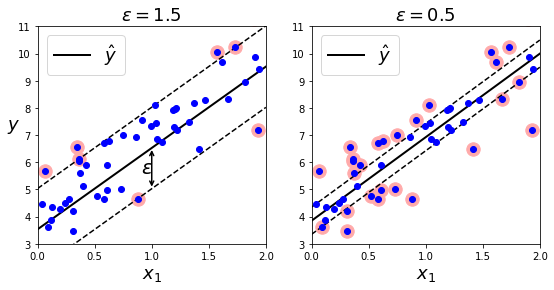

In [48]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
#save_fig("svm_regression_plot")
plt.show()

### Go back to the slides

# Use kernel-ized SVM model to handle nonlinear regression jobs.

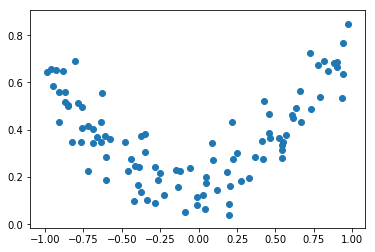

In [49]:
### Example: Nonlinear SVM Regression in Scikit-Learn
#### Step 1
from sklearn.svm import SVR
import numpy.random as rnd
import matplotlib.pyplot as plt

from sklearn.svm import SVR

rnd.seed(42)
m = 100
X = 2 * rnd.rand(m,1) -1
y = (0.2 + 0.1 * X + 0.5 * X**2 + rnd.randn(m, 1)/10).ravel()

plt.scatter(X,y)
plt.show()

(200, 1)


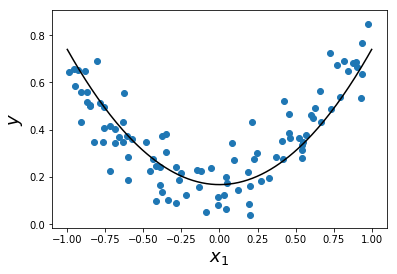

In [50]:
#### Step 2

from sklearn.svm import SVR

svr_poly_reg1 = SVR(kernel="poly", degree=2, C = 100, epsilon = 0.1)
svr_poly_reg1.fit(X,y)
x1s = np.linspace(-1,1,200).reshape(200,1)
print(x1s.shape)
y1s = svr_poly_reg1.predict(x1s)
plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18)
plt.scatter(X,y)
plt.plot(x1s, y1s, 'k-')
plt.show()

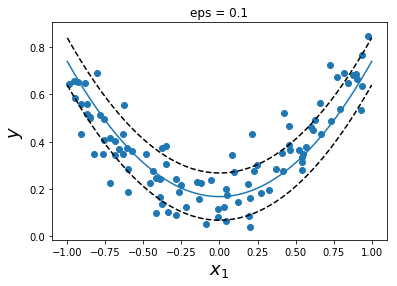

In [51]:
#### Step 3
y1s_eps1 = y1s + 0.1
y1s_eps2 = y1s - 0.1
plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18)
plt.scatter(X,y)
plt.plot(x1s, y1s)
plt.plot(x1s, y1s_eps1, 'k--')
plt.plot(x1s, y1s_eps2, 'k--')
plt.title('eps = 0.1')
plt.show()

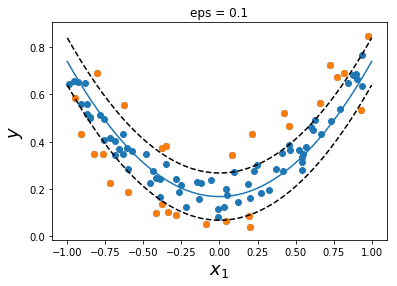

In [52]:
#### Step 4

y1_predict = svr_poly_reg1.predict(X)
supp_vectors_X = X[np.abs(y-y1_predict)>0.1]
supp_vectors_y = y[np.abs(y-y1_predict)>0.1]
plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18)
plt.scatter(X,y)
plt.plot(x1s, y1s)
plt.plot(x1s, y1s_eps1, 'k--')
plt.plot(x1s, y1s_eps2, 'k--')
plt.scatter(supp_vectors_X,supp_vectors_y)
plt.title('eps = 0.1')
plt.show()

### Go back to slides

In [53]:
### Example: Comparison of non-linear SVM Regression with different hyper parameters
from sklearn.svm import SVR

# random quadratic training set.
rnd.seed(42)
m = 100
X = 2 * rnd.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + rnd.randn(m, 1)/10).ravel()

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg3 = SVR(kernel="poly", degree=2, C=100, epsilon=0.25)
svm_poly_reg4 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.25)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)
svm_poly_reg3.fit(X, y)
svm_poly_reg4.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.25, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

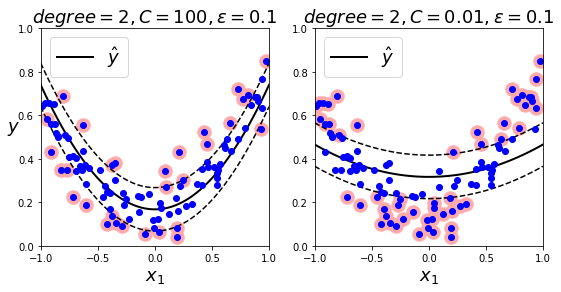

In [54]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
#save_fig("svm_with_polynomial_kernel_plot")
plt.show()

# left: little regularization (large C)
# right: much more regularization (little C)

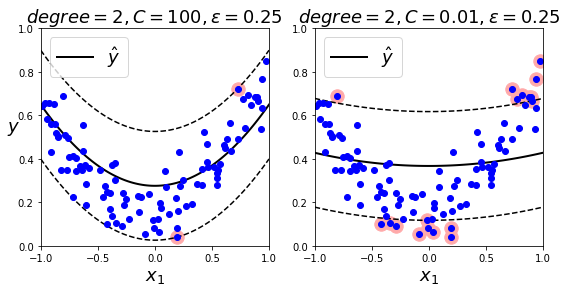

In [55]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg3, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg3.degree, svm_poly_reg3.C, svm_poly_reg3.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg4, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg4.degree, svm_poly_reg4.C, svm_poly_reg4.epsilon), fontsize=18)
#save_fig("svm_with_polynomial_kernel_plot")
plt.show()

# left: little regularization (large C)
# right: much more regularization (little C)

### Go back to slides

### Archives

In [56]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

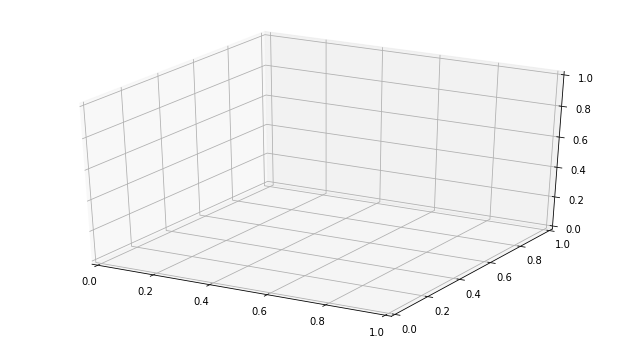

In [57]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, 0, color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=15)
    ax.set_xlabel(r"Petal length", fontsize=15)
    ax.set_ylabel(r"Petal width", fontsize=15)
    ax.set_zlabel(r"$h = \mathbf{w}^t \cdot \mathbf{x} + b$", fontsize=18)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
#plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

#save_fig("iris_3D_plot")
#plt.show()

### Training Objectives
* Slope of a decision function equals a weight vector's **norm** (||w||)
* Divide slope by 2 ==> any points where decision function = +1/-1 will be **2x away from decision boundary.**
![example](pics/small-weight-vector-large-margin.png)
* So we want minimal ||w|| to get max margins
* If we also want zero margin violations, then decision function needs to be GT1 (positive) and LT1 (negative).
* if soft margins OK - need to define a *slack variable* (C) for tradeoff.

### Quadratic programming
* Hard- & soft-margin problems = convex quadratic optimization problems with linear constraints, ie *quadratic programming* (QP) problems. See [Convex Optimization for more info](http://goo.gl/FGXuLw).

### The dual problem
### Kernelized SVM
### Online (incremental learning) SVMs

* Linear SVM classifiers often use **SGD** to find a min-cost solution. SGD converges **much more slowly** than QP-based methods.
* [implementation:](http://goo.gl/JEqVui)
* [implementation:](https://goo.gl/hsoUHA)
